In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import randint

# Đọc dữ liệu từ file CSV (giả sử có cột 'X' và 'Y')
data = pd.read_csv("samsung_phones.csv")  # Thay "data.csv" bằng tên file của bạn
df = pd.DataFrame(data, columns=['NAME', 'RAM', 'MEMORY', 'PIN', 'PRICE'])
print(df)

# Chuẩn bị dữ liệu cho mô hình hồi quy
X = df.drop(['PRICE', 'NAME'], axis=1)  # Định dạng DataFrame
y = df['PRICE']  # Định dạng Series

                            NAME  RAM  MEMORY   PIN     PRICE
0        Samsung Galaxy A01 Core    1      16  3000   1850000
1             Samsung Galaxy A11    3      32  4000   2650000
2            Samsung Galaxy A02s    4      64  5000   3350000
3        Samsung Galaxy J7 Prime    3      32  3300   3790000
4            Samsung Galaxy A21s    3      32  5000   4250000
5          Samsung Galaxy A22 4G    6     128  5000   4700000
6            Samsung Galaxy A30s    4      64  4000   4150000
7             Samsung Galaxy A31    6     128  5000   5150000
8             Samsung Galaxy A52    8     128  4500   6600000
9             Samsung Galaxy A72    8     256  5000  10100000
10   Samsung Galaxy Note 10 Lite    8     128  4500  10500000
11           Samsung Galaxy S10+    8     128  4100  12400000
12      Samsung Galaxy S21 FE 5G    8     256  4500  13650000
13         Samsung Galaxy S21 FE    8     128  4500  12790000
14           Samsung Galaxy S20+    8     128  4500  15500000
15      

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
}
rf_grid = RandomizedSearchCV(rf, rf_params, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_grid.fit(X_train, y_train)  # Fit the RandomizedSearchCV for Random Forest

# Dự đoán với mô hình tốt nhất (Random Forest Regression)
best_model = rf_grid.best_estimator_
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)  
accuracy_rf = rf_grid.best_estimator_.score(X_test, y_test)
print(f"ACCURACY: {accuracy_rf:.2f}")
# Dự đoán với mô hình tốt nhất trên một mẫu mới
new_phone = np.array([[4, 64, 8000]])   
predicted_price = best_model.predict(new_phone)
print(f"Giá dự đoán cho mẫu mới: {predicted_price[0]:.2f}")

ACCURACY: 0.64
Giá dự đoán cho mẫu mới: 3753458.33


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb = GradientBoostingRegressor()
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
}
gb_grid = RandomizedSearchCV(gb, gb_params, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
gb_grid.fit(X_train, y_train)  # Fit the RandomizedSearchCV for Gradient Boosting

# Dự đoán với mô hình tốt nhất (Gradient Boosting Regression)
best_model_gb = gb_grid.best_estimator_
best_model_gb.fit(X_train, y_train)
best_pred = best_model_gb.predict(X_test) 
accuracy_gb = gb_grid.best_estimator_.score(X_test, y_test)
print(f"ACCURACY: {accuracy_gb:.2f}")
# Dự đoán với mô hình tốt nhất trên một mẫu mới
new_phone = np.array([[4, 64, 8000]])
predicted_price = best_model_gb.predict(new_phone)
print(f"Giá dự đoán cho mẫu mới: {predicted_price[0]:.2f}")

ACCURACY: 0.56
Giá dự đoán cho mẫu mới: 4443572.49


In [5]:
import random
random.seed(42)
new_phones = np.array(df[['RAM', 'MEMORY', 'PIN']].values.tolist())
predicted_prices = best_model.predict(new_phones)
predicted_prices_gb = best_model_gb.predict(new_phones)
print("Giá dự đoán cho 20 mẫu mới:")
for i, price in enumerate(predicted_prices):
    print(f"Mẫu {i+1}: {price:.2f}")

for i, price in enumerate(predicted_prices_gb):
    print(f"Mẫu {i+1}: {price:.2f}")

Giá dự đoán cho 20 mẫu mới:
Mẫu 1: 4460800.00
Mẫu 2: 3303400.00
Mẫu 3: 3753458.33
Mẫu 4: 4460800.00
Mẫu 5: 4008058.33
Mẫu 6: 5353985.00
Mẫu 7: 3936800.00
Mẫu 8: 5353985.00
Mẫu 9: 12812780.48
Mẫu 10: 13800400.00
Mẫu 11: 12812780.48
Mẫu 12: 11848182.14
Mẫu 13: 15975751.67
Mẫu 14: 12812780.48
Mẫu 15: 12812780.48
Mẫu 16: 15638683.33
Mẫu 17: 24215000.00
Mẫu 18: 17776800.00
Mẫu 19: 16401000.00
Mẫu 20: 19490900.00
Mẫu 21: 24215000.00
Mẫu 22: 25799000.00
Mẫu 23: 28546100.00
Mẫu 24: 29948800.00
Mẫu 1: 4515757.34
Mẫu 2: 4515757.34
Mẫu 3: 4443572.49
Mẫu 4: 4515757.34
Mẫu 5: 4152690.44
Mẫu 6: 4444911.39
Mẫu 7: 4806639.39
Mẫu 8: 4444911.39
Mẫu 9: 12580015.35
Mẫu 10: 14124077.08
Mẫu 11: 12580015.35
Mẫu 12: 13013592.58
Mẫu 13: 17506059.26
Mẫu 14: 12580015.35
Mẫu 15: 12580015.35
Mẫu 16: 17583734.55
Mẫu 17: 26987002.12
Mẫu 18: 18434552.60
Mẫu 19: 18434552.60
Mẫu 20: 18548343.57
Mẫu 21: 26987002.12
Mẫu 22: 28028224.77
Mẫu 23: 28028224.77
Mẫu 24: 27915495.45


Dữ liệu ban đầu:
                       NAME  RAM  MEMORY   PIN    PRICE
0  Samsung Galaxy A01 Core    1      16  3000  1850000
1       Samsung Galaxy A11    3      32  4000  2650000
2      Samsung Galaxy A02s    4      64  5000  3350000
3  Samsung Galaxy J7 Prime    3      32  3300  3790000
4      Samsung Galaxy A21s    3      32  5000  4250000

Dữ liệu sau khi giảm chiều:
 [[2998.11432199 -107.48501965]
 [3997.93173497 -132.55189369]
 [4998.39673424 -141.79582259]
 [3298.54332382 -103.44201782]
 [4997.08616508 -173.66642297]]

MSE (Sai số bình phương trung bình) sau khi giảm chiều: 5250039575780.6045


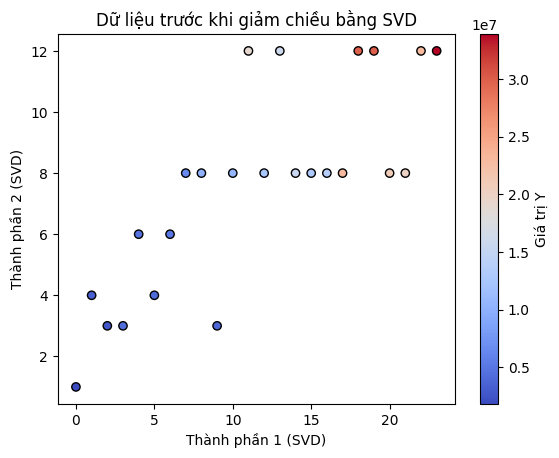

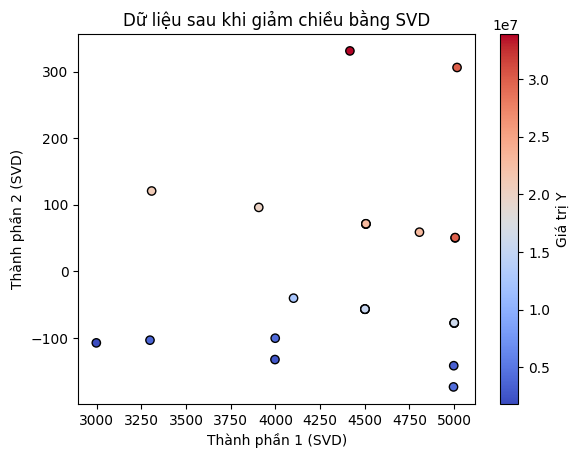

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

# 1. Đọc dữ liệu từ file CSV
data = pd.read_csv("samsung_phones.csv")  # Thay bằng đường dẫn file của bạn
print("Dữ liệu ban đầu:\n", data.head())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['NAME'] = le.fit_transform(data['NAME'])

# 2. Tách biến độc lập (X) và biến mục tiêu (y)
# 2. Tách biến độc lập (X) và biến mục tiêu (y)
X = data.iloc[:, :-1]  # Chọn tất cả cột trừ cột cuối cùng
y = data.iloc[:, -1]   # Cột cuối cùng là biến mục tiêu  

# 3. Áp dụng SVD để giảm chiều dữ liệu
svd = TruncatedSVD(n_components=2)  # Giảm dữ liệu về 2 chiều
X_reduced = svd.fit_transform(X)

print("\nDữ liệu sau khi giảm chiều:\n", X_reduced[:5])  # Hiển thị 5 dòng đầu

# 4. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 5. Huấn luyện mô hình hồi quy tuyến tính trên dữ liệu đã giảm chiều
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"\nMSE (Sai số bình phương trung bình) sau khi giảm chiều: {mse:.4f}")

# Trực quan hóa dữ liệu trước khi giảm chiều
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.colorbar(label="Giá trị Y")
plt.xlabel("Thành phần 1 (SVD)")
plt.ylabel("Thành phần 2 (SVD)")
plt.title("Dữ liệu trước khi giảm chiều bằng SVD")
plt.show()

# 7. Trực quan hóa dữ liệu sau khi giảm chiều
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.colorbar(label="Giá trị Y")
plt.xlabel("Thành phần 1 (SVD)")
plt.ylabel("Thành phần 2 (SVD)")
plt.title("Dữ liệu sau khi giảm chiều bằng SVD")
plt.show()


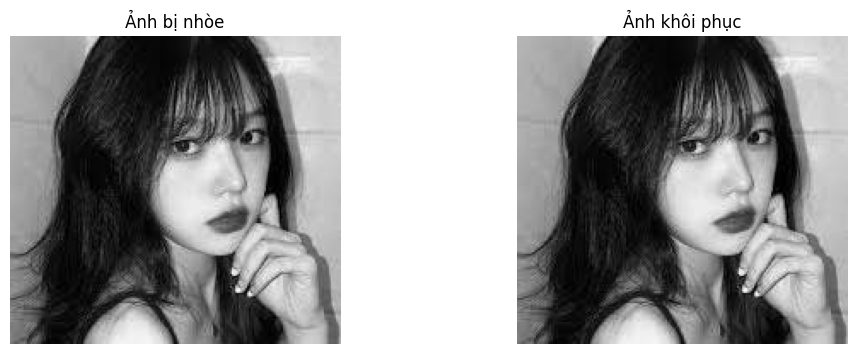

Ma trận ảnh ban đầu:
 (181, 194)


In [7]:
import cv2
from scipy.linalg import svd, diagsvd

def restore_image_svd(blurred, k):
    """Khôi phục ảnh bị nhòe bằng phương pháp SVD với k thành phần chính."""
    
    # Phân tích SVD của ảnh
    U, S, Vt = svd(blurred, full_matrices=False)
    
    # Chỉ giữ lại k giá trị suy biến lớn nhất
    S_k = np.zeros((k, k))
    np.fill_diagonal(S_k, S[:k])
    
    # Lấy ma trận U và Vt tương ứng với k thành phần đầu tiên
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    
    # Khôi phục ảnh từ k thành phần chính
    restored = U_k @ S_k @ Vt_k
    
    # Đưa pixel về khoảng [0, 255]
    restored = np.clip(restored, 0, 255)
    
    return restored

# Đọc ảnh bị nhòe
blurred_image = cv2.imread("anh_nhoe.jpg", cv2.IMREAD_GRAYSCALE)

# Khôi phục ảnh
restored_image = restore_image_svd(blurred_image, k=181)

# Hiển thị kết quả
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Ảnh bị nhòe")
plt.imshow(blurred_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Ảnh khôi phục")
plt.imshow(restored_image, cmap='gray')
plt.axis("off")

plt.show()

# Đọc ma trận của bức ảnh

image = cv2.imread("anh_nhoe.jpg", cv2.IMREAD_GRAYSCALE)
print("Ma trận ảnh ban đầu:\n", image.shape)